<a href="https://colab.research.google.com/github/aniketddeshmukh/Minor_Lab/blob/main/ISE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
#Checking shape of the data 
data.shape

(15936, 31)

In [6]:
#Finding unique elements in Class column
data['Class'].nunique()

2

In [7]:
# Checking null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [12]:
 #Filling Null values with Median
 data2= data.fillna(data.median())

In [13]:
data2.isnull().sum()
#There should not be any null values in data2

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
# Finding items in column Class and there number of occurences
print(sorted(Counter(data2['Class']).items()))

[(0.0, 15863), (1.0, 73)]


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [17]:
#Dividing dataframe into two data frames of Fraud and NotFraud
fraud =data2[data2['Class']==1]
not_fraud = data2[data2['Class']==0]

In [18]:
print(fraud.shape,not_fraud.shape,data.shape)

(73, 31) (15863, 31) (15936, 31)


* There are only 73 data points in Fraud dataframe.

* While, in not_fraud dataframe there are 15863 data points.





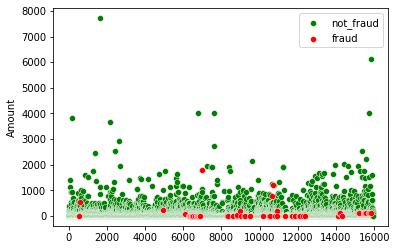

In [22]:
#Plotting the data
sns.scatterplot(data=not_fraud['Amount'],color='green')
sns.scatterplot(data=fraud['Amount'],color='red')
plt.legend(['not_fraud','fraud'])

In [29]:
#Finding percentage of Fraud cases and Not_Fraude cases in dataframe
print("Fraud Cases in our data set : ",len(fraud)*100/len(data2)," %")
print("Non Fraud Cases in our data set : ",len(not_fraud)*100/len(data2)," %")

Fraud Cases in our data set :  0.45808232931726905  %
Non Fraud Cases in our data set :  99.54191767068274  %


Thus from above result we can not that overr data is highly unbalanced. It contains only 0.458% of fraud cases datapoints.

We can use Under sampling or Oversampling method to overcome this.

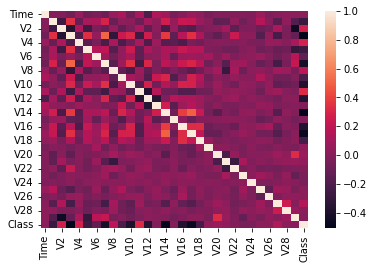

In [26]:
#Finding Correlations
sns.heatmap(data2.corr())


In [30]:
X = data2
Y = data2['Class']


In [31]:
X.drop('Time',axis=1,inplace=True)
X.drop('Class',axis=1,inplace=True)
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [57]:

# logistic regression 
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(x_train, y_train)
predictions1 = lr.predict(x_test)

print(classification_report(y_test, predictions1))


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4879
         1.0       0.98      1.00      0.99      4639

    accuracy                           0.99      9518
   macro avg       0.99      0.99      0.99      9518
weighted avg       0.99      0.99      0.99      9518



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **SMOTE**

In [37]:
#Spliting data
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=1)


In [32]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=50)
x_smote,y_smote=smote.fit_resample(X,Y)

In [58]:
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

After OverSampling, counts of label '1': 15863
After OverSampling, counts of label '0': 15863


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


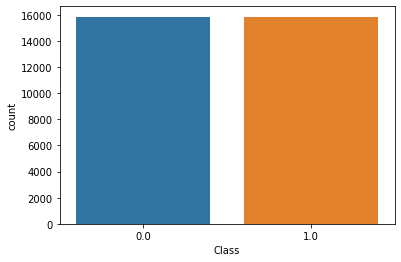

In [34]:
sns.countplot(y_smote)

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rf=make_pipeline(StandardScaler(),RandomForestClassifier())
rf.fit(x_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [39]:
yhat=rf.predict(x_test)


Precision score :  1.0
Recall score :  0.9991384880465216


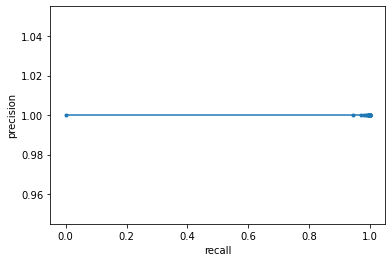

In [40]:
#Plotting precision Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score
precision,recall,_ = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(recall,precision,marker='.')
plt.xlabel('recall')
plt.ylabel('precision')
print("Precision score : ",precision_score(yhat,y_test,average='binary'))
print("Recall score : ",recall_score(yhat,y_test,average='binary'))

# **Logistic Regression**

In [59]:
lr1 = LogisticRegression()
lr1.fit(x_smote, y_smote)
predictions = lr1.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4879
         1.0       0.99      0.99      0.99      4639

    accuracy                           0.99      9518
   macro avg       0.99      0.99      0.99      9518
weighted avg       0.99      0.99      0.99      9518



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **KNN**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_smote, y_smote)
predictions = KNN.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4879
         1.0       1.00      1.00      1.00      4639

    accuracy                           1.00      9518
   macro avg       1.00      1.00      1.00      9518
weighted avg       1.00      1.00      1.00      9518



**Conclusion** :

We did oversampling and undersampling for imbalanced classification. There are various occasions where we may be confronted with an imbalanced dataset and applying random sampling may provide us with a very good model to overcome this problem in training and still maintain a model that generalizes well to new examples.